### Real-time Mass Spec Class

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [149]:
import numpy as np
import pandas as pd
import sys
import scipy.stats
import pylab as plt
from IPython import display
import pylab as plt

import asyncio
import random

In [4]:
sys.path.append('../codes')

In [5]:
from VMSfunctions.Chemicals import *
from VMSfunctions.Chromatograms import *
from VMSfunctions.MassSpec import *
from VMSfunctions.Controller import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

We want a notebook that does the following:
1. create a list of chemical
2. create a new real time mass spec object, takes chemicals
3. create a new controller, takes mass spec
4. write mzml files

In [6]:
ps = load_obj('../models/peak_sampler_4_beers.p')

In [7]:
xcms_output = '../models/beer_ms1_peaks.csv.gz'
chromatograms = ChromatogramCreator(xcms_output)

0


../codes\VMSfunctions\Common.py:53: RuntimeWarning:

divide by zero encountered in double_scalars



5000
10000
15000
20000
25000
30000
35000
40000
45000


In [8]:
chemicals = ChemicalCreator(ps, chromatograms)

In [9]:
min_ms1_intensity = 2E5
min_rt = 3*60
max_rt = 21*60
sampled_chemicals = chemicals.sample(min_rt, max_rt, min_ms1_intensity, 1000, 2, 'Unknown', 'Empirical', None, False)

### Set up a real time Top-N controller

In [72]:
max_rt = 200                    # the maximum retention time of scans to generate
N = 5                           # top-5 DDA fragmentation
mz_tol = 5                      # the mz isolation window around a selected precursor ion
rt_tol = 15                     # the rt window around a selected precursor ion to prevent it from fragmented multiple times
min_ms2_intensity = 5000        # the minimum ms2 peak intensity

In [144]:
mass_spec = IndependentMassSpectrometer(POSITIVE, sampled_chemicals, density=ps.density_estimator)

Acquisition open
Scan 1412 -- num_peaks=1 rt=180.89 ms_level=1
Isolated precursor ion 223.40919051225112 window [[(223.40807346629856, 223.41030755820367)]]



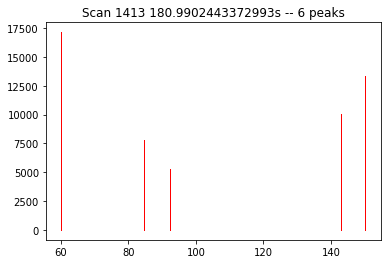

60.02656628697318 17146.825639313767
84.56233963126671 7760.61368453975
92.44216499050461 5285.186114590059
142.97032379120213 10060.83946283466
143.05865422983382 8079.685683976981
150.24492861241498 13316.643986407245

Scan 1414 -- num_peaks=2 rt=181.13 ms_level=1
Isolated precursor ion 164.876118763095 window [[(164.87529438250118, 164.87694314368883)]]
Excluded precursor ion 223.4087785877263 181.1269235362279 ExclusionItem(from_mz=223.40807346629856, to_mz=223.41030755820367, from_rt=165.89408402242307, to_rt=195.89408402242307)



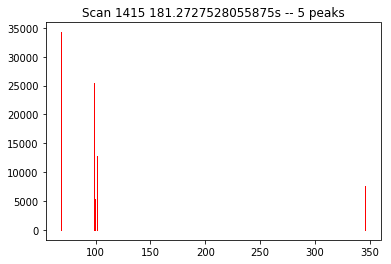

68.2127176728953 34252.467146650626
98.60549820019907 25400.248377446296
98.94183868392308 5315.407678886276
101.55036534293886 12727.425434789513
346.12894702256614 7584.799203484506

Scan 1416 -- num_peaks=2 rt=181.43 ms_level=1
Excluded precursor ion 164.87612061339374 181.42740875481368 ExclusionItem(from_mz=164.87529438250118, to_mz=164.87694314368883, from_rt=166.1269235362279, to_rt=196.1269235362279)
Excluded precursor ion 223.40824698882 181.42740875481368 ExclusionItem(from_mz=223.40807346629856, to_mz=223.41030755820367, from_rt=165.89408402242307, to_rt=195.89408402242307)

Scan 1417 -- num_peaks=2 rt=181.79 ms_level=1
Excluded precursor ion 164.8761228159472 181.78509951870438 ExclusionItem(from_mz=164.87529438250118, to_mz=164.87694314368883, from_rt=166.1269235362279, to_rt=196.1269235362279)
Isolated precursor ion 223.40761418558338 window [[(223.40649714751245, 223.4087312236543)]]



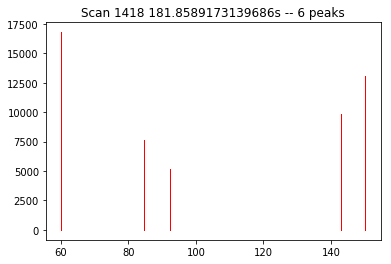

60.02656628697318 16795.955617178144
84.56233963126671 7601.8107228395165
92.44216499050461 5177.03703743578
142.97032379120213 9854.967714950653
143.05865422983382 7914.353653756409
150.24492861241498 13044.149749364899

Scan 1419 -- num_peaks=2 rt=181.98 ms_level=1
Excluded precursor ion 164.87612402411747 181.9813042156539 ExclusionItem(from_mz=164.87529438250118, to_mz=164.87694314368883, from_rt=166.1269235362279, to_rt=196.1269235362279)
Excluded precursor ion 223.40726707299396 181.9813042156539 ExclusionItem(from_mz=223.40649714751245, to_mz=223.4087312236543, from_rt=166.78509951870438, to_rt=196.78509951870438)

Scan 1420 -- num_peaks=2 rt=182.11 ms_level=1
Excluded precursor ion 164.87612478846117 182.10543227255448 ExclusionItem(from_mz=164.87529438250118, to_mz=164.87694314368883, from_rt=166.1269235362279, to_rt=196.1269235362279)
Excluded precursor ion 223.40714823434968 182.10543227255448 ExclusionItem(from_mz=223.40649714751245, to_mz=223.4087312236543, from_rt=166.785

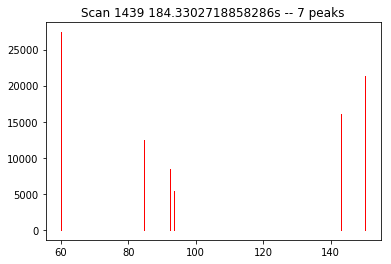

60.02656628697318 27396.230975142018
84.56233963126671 12399.47086900032
92.44216499050461 8444.372304687264
93.63674144159314 5329.466276569883
142.97032379120213 16074.641891481493
143.05865422983382 12909.266114963562
150.24492861241498 21276.58274129097

Scan 1440 -- num_peaks=3 rt=184.59 ms_level=1
Isolated precursor ion 192.5177515978236 window [[(192.5167890090656, 192.5187141865816)]]
Excluded precursor ion 223.40564444901136 184.58674927998462 ExclusionItem(from_mz=223.40517194196707, to_mz=223.4074060048568, from_rt=169.23136429703888, to_rt=199.23136429703888)
Excluded precursor ion 164.87607823856837 184.58674927998462 ExclusionItem(from_mz=164.87529438250118, to_mz=164.87694314368883, from_rt=166.1269235362279, to_rt=196.1269235362279)



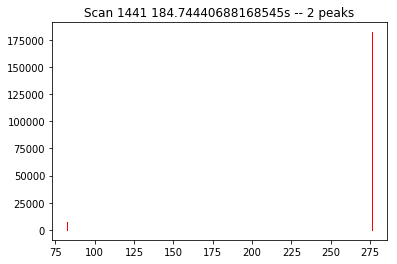

82.64085485826051 7377.165243403485
275.9951163632904 181867.82514214673

Scan 1442 -- num_peaks=3 rt=184.87 ms_level=1
Excluded precursor ion 192.51773814743783 184.86662060477462 ExclusionItem(from_mz=192.5167890090656, to_mz=192.5187141865816, from_rt=169.58674927998462, to_rt=199.58674927998462)
Excluded precursor ion 223.40607375828472 184.86662060477462 ExclusionItem(from_mz=223.40517194196707, to_mz=223.4074060048568, from_rt=169.23136429703888, to_rt=199.23136429703888)
Excluded precursor ion 164.87608103396136 184.86662060477462 ExclusionItem(from_mz=164.87529438250118, to_mz=164.87694314368883, from_rt=166.1269235362279, to_rt=196.1269235362279)

Scan 1443 -- num_peaks=3 rt=184.95 ms_level=1
Excluded precursor ion 192.5177342165129 184.94841403303315 ExclusionItem(from_mz=192.5167890090656, to_mz=192.5187141865816, from_rt=169.58674927998462, to_rt=199.58674927998462)
Excluded precursor ion 223.40619922550533 184.94841403303315 ExclusionItem(from_mz=223.40517194196707, to_mz=

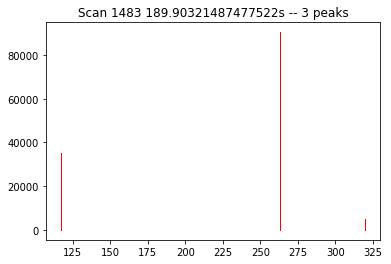

117.0203502578128 35066.70873492826
262.9131590951472 90413.04083057896
319.80425897941956 5029.152670643889

Scan 1484 -- num_peaks=5 rt=190.14 ms_level=1
Excluded precursor ion 192.51770142636775 190.14294358474027 ExclusionItem(from_mz=192.5167890090656, to_mz=192.5187141865816, from_rt=169.58674927998462, to_rt=199.58674927998462)
Excluded precursor ion 162.1161739562886 190.14294358474027 ExclusionItem(from_mz=162.11524278537175, to_mz=162.1168639459054, from_rt=171.22942723121713, to_rt=201.22942723121713)
Excluded precursor ion 278.4473215156677 190.14294358474027 ExclusionItem(from_mz=278.4458851038233, to_mz=278.4486695765967, from_rt=174.8425787452492, to_rt=204.8425787452492)
Excluded precursor ion 164.8761263047314 190.14294358474027 ExclusionItem(from_mz=164.87529438250118, to_mz=164.87694314368883, from_rt=166.1269235362279, to_rt=196.1269235362279)
Excluded precursor ion 193.29089501897758 190.14294358474027 ExclusionItem(from_mz=193.28992683747015, to_mz=193.29185974640

Scan 1493 -- num_peaks=5 rt=191.23 ms_level=1
Excluded precursor ion 192.51768619720517 191.23007957212988 ExclusionItem(from_mz=192.5167890090656, to_mz=192.5187141865816, from_rt=169.58674927998462, to_rt=199.58674927998462)
Excluded precursor ion 278.44745534737115 191.23007957212988 ExclusionItem(from_mz=278.4458851038233, to_mz=278.4486695765967, from_rt=174.8425787452492, to_rt=204.8425787452492)
Excluded precursor ion 164.87609133274472 191.23007957212988 ExclusionItem(from_mz=164.87529438250118, to_mz=164.87694314368883, from_rt=166.1269235362279, to_rt=196.1269235362279)
Excluded precursor ion 162.11619382594597 191.23007957212988 ExclusionItem(from_mz=162.11524278537175, to_mz=162.1168639459054, from_rt=171.22942723121713, to_rt=201.22942723121713)
Excluded precursor ion 193.29084159424755 191.23007957212988 ExclusionItem(from_mz=193.28992683747015, to_mz=193.29185974640308, from_rt=170.32821445770722, to_rt=200.32821445770722)

Scan 1494 -- num_peaks=4 rt=191.41 ms_level=1
E

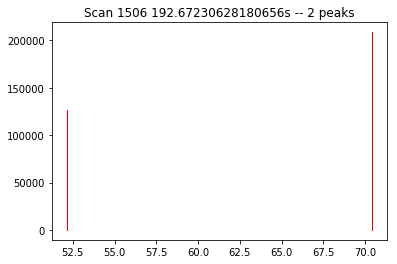

52.16461504822141 126636.56098887212
70.38555380064871 208528.4192851539

Scan 1507 -- num_peaks=4 rt=192.93 ms_level=1
Excluded precursor ion 96.53458707184657 192.9257956900414 ExclusionItem(from_mz=96.53409235152057, to_mz=96.53505769727082, from_rt=177.4937058114366, to_rt=207.4937058114366)
Excluded precursor ion 278.4472687785521 192.9257956900414 ExclusionItem(from_mz=278.4458851038233, to_mz=278.4486695765967, from_rt=174.8425787452492, to_rt=204.8425787452492)
Excluded precursor ion 162.11623019869143 192.9257956900414 ExclusionItem(from_mz=162.11524278537175, to_mz=162.1168639459054, from_rt=171.22942723121713, to_rt=201.22942723121713)
Excluded precursor ion 193.2908257145956 192.9257956900414 ExclusionItem(from_mz=193.28992683747015, to_mz=193.29185974640308, from_rt=170.32821445770722, to_rt=200.32821445770722)

Scan 1508 -- num_peaks=4 rt=193.00 ms_level=1
Excluded precursor ion 96.53458926730632 193.00453732113223 ExclusionItem(from_mz=96.53409235152057, to_mz=96.5350576

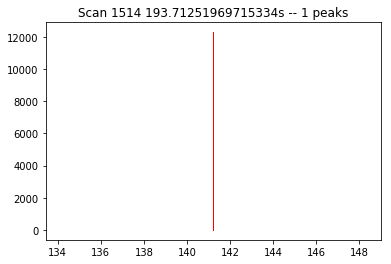

141.21091202240515 12286.925291744747

Scan 1515 -- num_peaks=6 rt=193.84 ms_level=1
Excluded precursor ion 96.5346126546088 193.8433385571259 ExclusionItem(from_mz=96.53409235152057, to_mz=96.53505769727082, from_rt=177.4937058114366, to_rt=207.4937058114366)
Excluded precursor ion 278.4472142641517 193.8433385571259 ExclusionItem(from_mz=278.4458851038233, to_mz=278.4486695765967, from_rt=174.8425787452492, to_rt=204.8425787452492)
Excluded precursor ion 162.11619985815216 193.8433385571259 ExclusionItem(from_mz=162.11524278537175, to_mz=162.1168639459054, from_rt=171.22942723121713, to_rt=201.22942723121713)
Excluded precursor ion 193.29094386306042 193.8433385571259 ExclusionItem(from_mz=193.28992683747015, to_mz=193.29185974640308, from_rt=170.32821445770722, to_rt=200.32821445770722)
Excluded precursor ion 175.39946570771076 193.8433385571259 ExclusionItem(from_mz=175.39855460891593, to_mz=175.400308603232, from_rt=178.65456528187147, to_rt=208.65456528187147)

Scan 1516 -- num_p

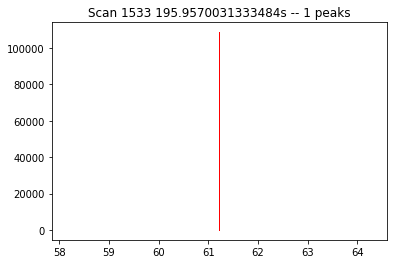

61.218962642887625 108701.91165822299

Scan 1534 -- num_peaks=6 rt=196.08 ms_level=1
Excluded precursor ion 96.53467375647534 196.0803966854521 ExclusionItem(from_mz=96.53409235152057, to_mz=96.53505769727082, from_rt=177.4937058114366, to_rt=207.4937058114366)
Excluded precursor ion 452.3987752699988 196.0803966854521 ExclusionItem(from_mz=452.3964544960261, to_mz=452.400978483191, from_rt=180.89400793850908, to_rt=210.89400793850908)
Excluded precursor ion 278.44743559220785 196.0803966854521 ExclusionItem(from_mz=278.4458851038233, to_mz=278.4486695765967, from_rt=174.8425787452492, to_rt=204.8425787452492)
Excluded precursor ion 164.31918531719487 196.0803966854521 ExclusionItem(from_mz=164.3183758423041, to_mz=164.3200190342785, from_rt=178.4295047579968, to_rt=208.4295047579968)
Excluded precursor ion 175.39986911316396 196.0803966854521 ExclusionItem(from_mz=175.39855460891593, to_mz=175.400308603232, from_rt=178.65456528187147, to_rt=208.65456528187147)

Scan 1535 -- num_peaks=

In [145]:
controller = TopNController(mass_spec, N, mz_tol, rt_tol, min_ms2_intensity=min_ms2_intensity)
controller.run(max_rt)

In [13]:
# controller.write_mzML('my_analysis', '../models/out.mzML')

Try the example from https://asyncio.readthedocs.io/en/latest/producer_consumer.html

In [146]:
async def produce(queue, n):
    for x in range(1, n + 1):
        # produce an item
        print('producing {}/{}'.format(x, n))
        # simulate i/o operation using sleep
        await asyncio.sleep(random.random())
        item = str(x)
        # put the item in the queue
        await queue.put(item)

    # indicate the producer is done
    await queue.put(None)

In [147]:
async def consume(queue):
    while True:
        # wait for an item from the producer
        item = await queue.get()
        if item is None:
            # the producer emits None to indicate that it is done
            break

        # process the item
        print('consuming item {}...'.format(item))
        # simulate i/o operation using sleep
        await asyncio.sleep(random.random())

In [150]:
loop = asyncio.new_event_loop()
asyncio.set_event_loop(asyncio.new_event_loop())
loop = asyncio.get_event_loop()

In [151]:
queue = asyncio.Queue(loop=loop)
producer_coro = produce(queue, 10)
consumer_coro = consume(queue)
loop.run_until_complete(asyncio.gather(producer_coro, consumer_coro))
loop.close()

producing 1/10
producing 2/10
consuming item 1...
producing 3/10
consuming item 2...
producing 4/10
producing 5/10
producing 6/10
producing 7/10
consuming item 3...
consuming item 4...
consuming item 5...
producing 8/10
consuming item 6...
consuming item 7...
producing 9/10
consuming item 8...
producing 10/10
consuming item 9...
consuming item 10...


In [158]:
import time

async def say_after(delay, what):
    await asyncio.sleep(delay)
    print(what)

async def main():
    print(f"started at {time.strftime('%X')}")

    await say_after(1, 'hello')
    await say_after(2, 'world')

    print(f"finished at {time.strftime('%X')}")

loop = asyncio.new_event_loop()
asyncio.set_event_loop(asyncio.new_event_loop())
loop = asyncio.get_event_loop()
loop.run_until_complete(main())
loop.close()

started at 15:23:39
hello
world
finished at 15:23:42


In [ ]:
class RealTimeIndependentMassSpectrometer(IndependentMassSpectrometer):
    def __init__(self, ionisation_mode, chemicals, density=None):
        super().__init__(ionisation_mode, chemicals, density=density)
        
    def fire_event(self, event_name, arg=None):
        if event_name not in self.event_dict:
            raise ValueError('Unknown event name')

        # fire the event
        e = self.event_dict[event_name]
        if arg is not None:
            e(arg)
        else:
            e()
